## Ice Temperature (icetemp) Analysis

Analyzing thermistor data from South Pole neutrino experiments during the time period 2002 - 2010

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Imports from ice temperature estimation package
import icetemp
import icetemp.data_io as io
import icetemp.model as m

____
# Inference on all years, least-squares regression, polynomial fits

## Quadratic fit


Best fit values for real data of 2002:
b = -46.2 ± 0.201
m = -0.00849 ± 0.000257
q = 8.07e-06 ± 8.09e-08

Best fit values for real data of 2007:
b = -19.9 ± 12.9
m = -0.0336 ± 0.0114
q = 1.41e-05 ± 2.5e-06

Best fit values for real data of 2009:
b = -17.9 ± 12.9
m = -0.0353 ± 0.0114
q = 1.45e-05 ± 2.5e-06

Best fit values for real data of 2010:
b = -11.6 ± 12.9
m = -0.041 ± 0.0114
q = 1.58e-05 ± 2.5e-06


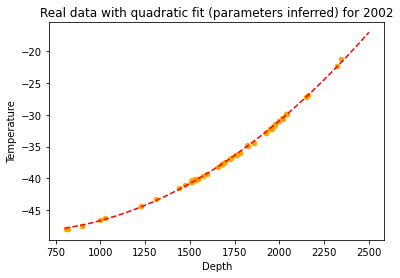

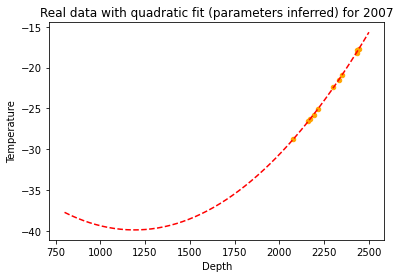

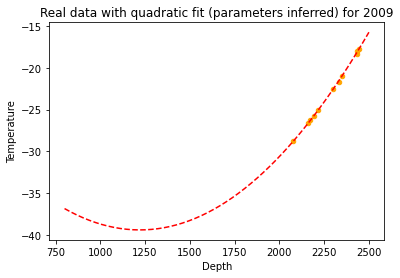

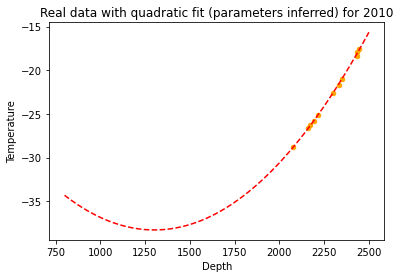

In [2]:
# load real data
data_2002 = io.load_ice_data("amanda_temp.txt", data_year=2002,temp_errors=0.1, depth_errors=2) 
data_2007 = io.load_ice_data("icecube_temp.2007.txt", data_year=2007,temp_errors=0.1, depth_errors=2)
data_2009 = io.load_ice_data("icecube_temp.2009.txt", data_year=2009,temp_errors=0.1, depth_errors=2)
data_2010 = io.load_ice_data("icecube_temp.2010.txt", data_year=2010,temp_errors=0.1, depth_errors=2)

data = [data_2002, data_2007, data_2009, data_2010]
x = np.linspace(800,2500)


for year in range(len(data)):
    params, param_errors = m.fit_quad(data[year])

    # print formatting function adapted from HW 6 solutions
    print("\nBest fit values for real data of {}:".format(data[year]['data_year'][0]))
    for value, sigma, name in zip(params, param_errors, 'bmq'):
        print('{} = {:.3} ± {:.3}'.format(name, value, sigma))

    x.sort()    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='red')
    plt.title("Real data with quadratic fit (parameters inferred) for {}".format(data[year]['data_year'][0]))

____
# Inference on all years, MCMC

## Quadratic fit

/Users/Josh/Desktop/physics201/icetemp/icetemp/model.py:166: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  traces = pm.sample(start=init_guess, tune=n_tuning_steps, draws=n_draws, chains=n_chains) # need at least two chains to use following arviz function
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [C_2, C_0, C_1]


Sampling 5 chains for 1_500 tune and 2_500 draw iterations (7_500 + 12_500 draws total) took 64 seconds.
The number of effective samples is smaller than 25% for some parameters.


Paremters from MCMC for the year 2002
[-4.62061869e+01 -8.49026400e-03  8.06500000e-06]


/Users/Josh/anaconda3/envs/env2/lib/python3.9/site-packages/pymc3/distributions/transforms.py:294: RuntimeWarning: invalid value encountered in log
  return floatX(np.log(x - a) - np.log(b - x))


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'C_0': -20, 'C_1': -0.0336, 'C_2': 1.41e-05, 'C_0_interval__': nan}

Initial evaluation results:
C_1               0.0
C_0_interval__    NaN
C_2               0.0
temp_pred         NaN
Name: Log-probability of test_point, dtype: float64

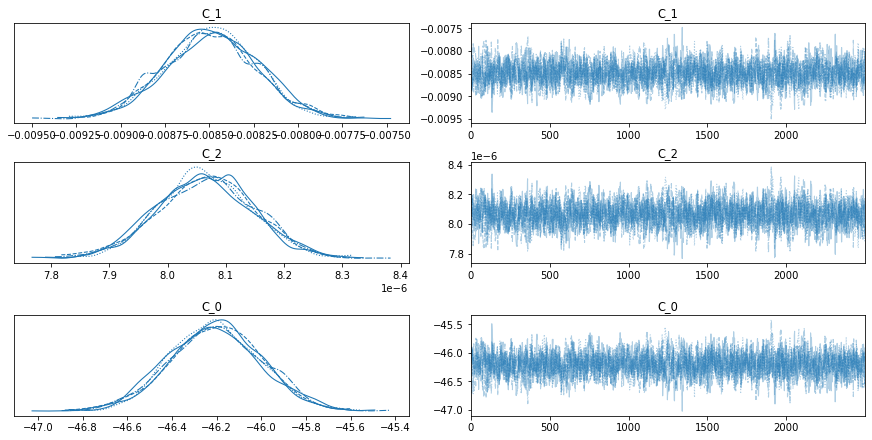

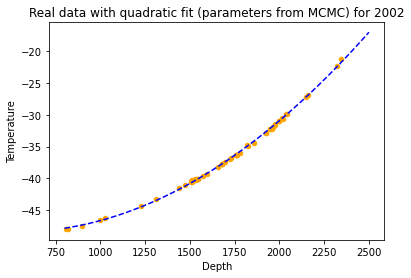

In [25]:
#MCMC on real data
init_guess_all = [{'C_0':-50, 'C_1':-0.0009, 'C_2':8.07e-06},
                  {'C_0':-20, 'C_1':-0.0336, 'C_2':1.41e-05},
                  {'C_0':-18, 'C_1':-0.0353, 'C_2':1.45e-05},
                  {'C_0':-12, 'C_1':-0.0410, 'C_2':1.58e-05}] #based on the results from the algebraic fit of all datasets (see above)

#base all initial guesses on amanda dataset algebraic fit
'''
init_guess_all = [{'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06},
                  {'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06},
                  {'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06},
                  {'C_0':-46, 'C_1':-0.009, 'C_2':8.07e-06}]
'''
year_list = []
temp_list = []
pred_errs_list = []
for year in range(len(data)):
    params, errors = m.fit_quad_MCMC(data[year], init_guess_all[year]) # returns params in order b, m, q
    print("Paremters from MCMC for the year {}".format(data[year]['data_year'][0]))
    print(params)
    
    year_list.append(data[year]['data_year'][0])
    temp_list.append(params[0])
    pred_errs_list.append(errors[0])
    
    data[year].plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
    plt.plot(x, params[2]*x**2 + params[1]*x + params[0], linestyle='dashed', color='blue')
    plt.title("Real data with quadratic fit (parameters from MCMC) for {}".format(data[year]['data_year'][0]))

## MCMC, generalized 

/Users/Josh/Desktop/physics201/icetemp/icetemp/model.py:225: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  traces = pm.sample(start=init_guess, tune=n_tuning_steps, draws=ndraws, chains=4) # need at least two chains to use following arviz function
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 31 seconds.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 49 divergences after tuning. Increase `target_accept` or reparameterize.
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


/Users/Josh/Desktop/physics201/icetemp/icetemp/model.py:225: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  traces = pm.sample(start=init_guess, tune=n_tuning_steps, draws=ndraws, chains=4) # need at least two chains to use following arviz function
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 75 seconds.
The acceptance probability does not match the target. It is 0.9013403565611389, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


/Users/Josh/Desktop/physics201/icetemp/icetemp/model.py:225: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  traces = pm.sample(start=init_guess, tune=n_tuning_steps, draws=ndraws, chains=4) # need at least two chains to use following arviz function
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 64 seconds.
There were 203 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9150546856659428, but should be close to 0.8. Try to increase the number of tuning steps.
There were 206 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7108844164833925, but should be close to 0.8. Try to increase the number of tuning steps.
There were 216 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.631208733813761, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parame

/Users/Josh/Desktop/physics201/icetemp/icetemp/model.py:225: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  traces = pm.sample(start=init_guess, tune=n_tuning_steps, draws=ndraws, chains=4) # need at least two chains to use following arviz function
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [C_2, C_1, C_0]


Sampling 4 chains for 1_500 tune and 2_500 draw iterations (6_000 + 10_000 draws total) took 61 seconds.
There were 195 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6595287654615959, but should be close to 0.8. Try to increase the number of tuning steps.
There were 199 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.688630336601359, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8880342392247178, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.



Paremters from MCMC for the year 2002
[-4.70461726e+01 -7.43627800e-03  7.74600000e-06]
Paremters from MCMC for the year 2007
[-4.95273759e+01 -7.56300700e-03  8.41300000e-06]
Paremters from MCMC for the year 2009
[-4.89054204e+01 -8.02891800e-03  8.48900000e-06]
Paremters from MCMC for the year 2010
[-4.95684285e+01 -7.61538200e-03  8.43300000e-06]


,year,temperature,prediction_errors
0,2002,-47.046173,0.043925
1,2007,-49.527376,1.695888
2,2009,-48.905420,1.520140
3,2010,-49.568428,1.866805


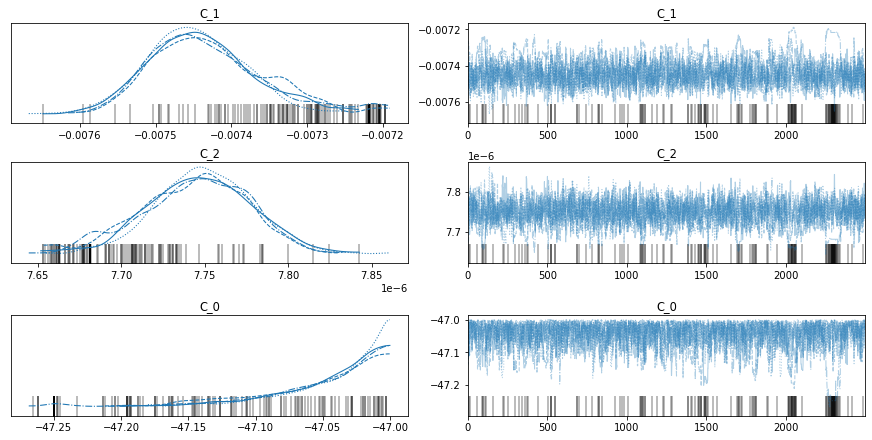

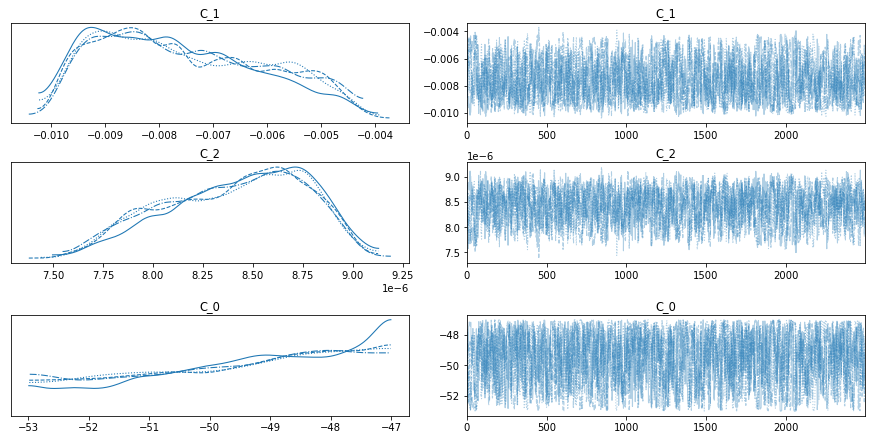

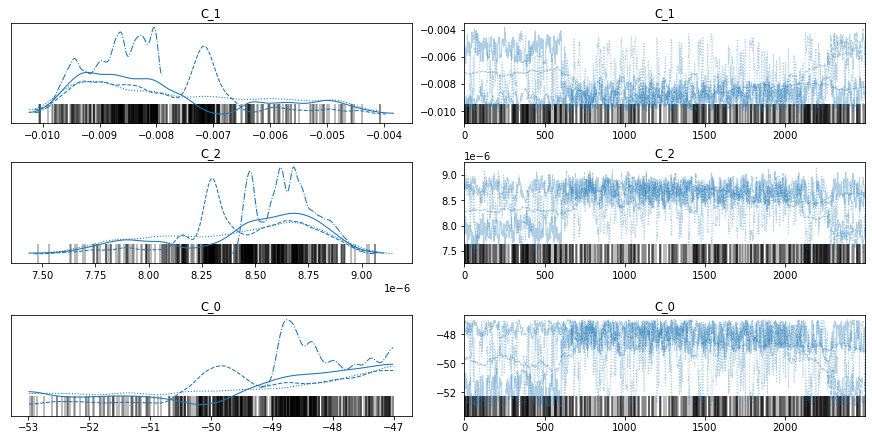

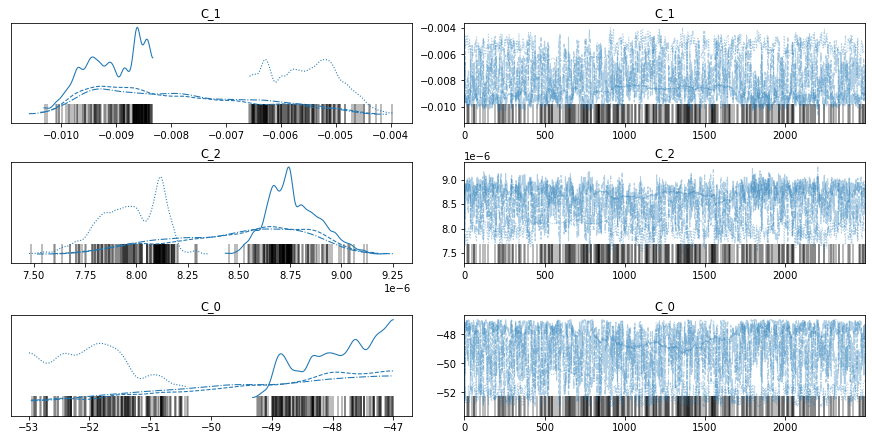

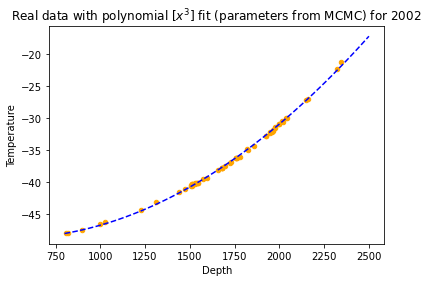

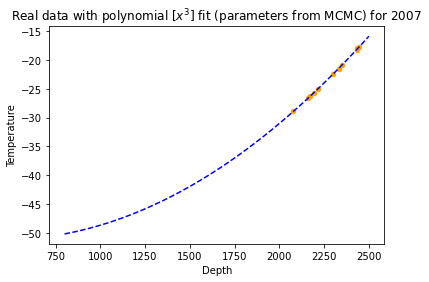

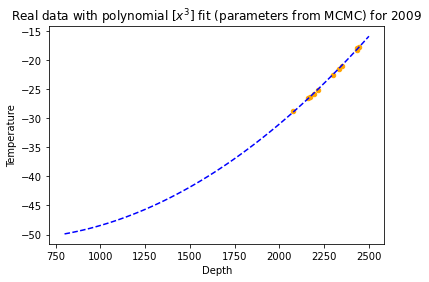

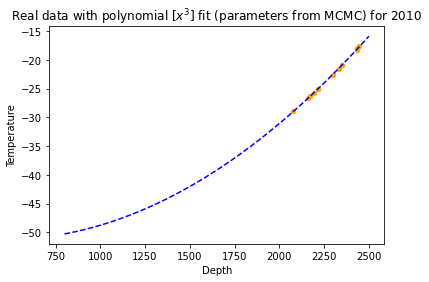

In [4]:
n = 2
init_guess_all2 = [{'C_0':-50, 'C_1':-0.0009, 'C_2':8.07e-06},
                  {'C_0':-50, 'C_1':-0.0336, 'C_2':1.41e-05},
                  {'C_0':-50, 'C_1':-0.0353, 'C_2':1.45e-05},
                  {'C_0':-50, 'C_1':-0.0410, 'C_2':1.58e-05}] #based on the results from the algebraic fit of all datasets (see above)
params_list = []
params_errors_list = []
for year in range(len(data)):
        params, errors = m.n_polyfit_MCMC(n, data[year], init_guess_all2[year]) # returns params in order C_0, C_1, C_2,...
        params_list.append(params)
        params_errors_list.append(errors)
        
# plot fit
m.plot_polyfit(data, params_list)

# get timetable
m.get_timetable(data, params_list, params_errors_list)

In [13]:
n = 3
init_guess_all3 = [{'C_0':-40, 'C_1':-0.0009, 'C_2':8.07e-06, 'C_3':0.00},
                  {'C_0':-20, 'C_1':-0.0336, 'C_2':1.41e-05, 'C_3':0.00},
                  {'C_0':-18, 'C_1':-0.0353, 'C_2':1.45e-05, 'C_3':0.00},
                  {'C_0':-12, 'C_1':-0.0410, 'C_2':1.58e-05, 'C_3':0.00}] #based on the results from the algebraic fit of all datasets (see above)
#timetable_poly_3 = m.get_timetable(n, data, init_guess_all3)

In [6]:
n = 4
init_guess_all4 = [{'C_0':-40, 'C_1':-0.0009, 'C_2':8.07e-06, 'C_3':0.00, 'C_4':0.00},
                  {'C_0':-20, 'C_1':-0.0336, 'C_2':1.41e-05, 'C_3':0.00, 'C_4':0.00},
                  {'C_0':-18, 'C_1':-0.0353, 'C_2':1.45e-05, 'C_3':0.00, 'C_4':0.00},
                  {'C_0':-12, 'C_1':-0.0410, 'C_2':1.58e-05, 'C_3':0.00, 'C_4':0.00}]
#timetable_poly_4 = m.get_timetable(n, data, init_guess_all4)

In [7]:
n = 5
#timetable_poly_5 = m.get_timetable(n, data, init_guess_all)

In [8]:
n = 6
#timetable_poly_6 = m.get_timetable(n, data, init_guess_all)

## Odds ratio using MCMC models

In [9]:
# comparison of 2nd order and 3rd order polynomials
n_M1 = 2
n_M2 = 3

init_guess_all2 = [{'C_0':-40, 'C_1':-0.0009, 'C_2':8.07e-06},
                  {'C_0':-20, 'C_1':-0.0336, 'C_2':1.41e-05},
                  {'C_0':-18, 'C_1':-0.0353, 'C_2':1.45e-05},
                  {'C_0':-12, 'C_1':-0.0410, 'C_2':1.58e-05}]

init_guess_all3 = [{'C_0':-40, 'C_1':-0.0009, 'C_2':8.07e-06, 'C_3':0.00},
                  {'C_0':-20, 'C_1':-0.0336, 'C_2':1.41e-05, 'C_3':0.00},
                  {'C_0':-18, 'C_1':-0.0353, 'C_2':1.45e-05, 'C_3':0.00},
                  {'C_0':-12, 'C_1':-0.0410, 'C_2':1.58e-05, 'C_3':0.00}]

odds_ratios = m.get_odds_ratio(n_M1, n_M2, data, init_guess_all2, init_guess_all3)
for year in range(len(data)):
    print('The odds ratio for tha data set of the year {} is:'.format(data[year]['data_year'][0]), odds_ratios[year])

/Users/Josh/anaconda3/envs/env2/lib/python3.9/site-packages/pymc3/distributions/transforms.py:294: RuntimeWarning: invalid value encountered in log
  return floatX(np.log(x - a) - np.log(b - x))


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'C_0': -40, 'C_1': -0.0009, 'C_2': 8.07e-06, 'C_0_interval__': nan}

Initial evaluation results:
C_0_interval__    NaN
C_1               0.0
C_2               0.0
temp_pred         NaN
Name: Log-probability of test_point, dtype: float64

____
# After inferring temperature at ground level, use GPR

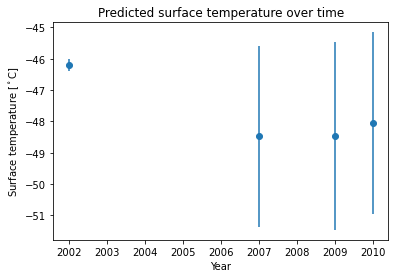

In [24]:
timetable = pd.DataFrame({'year': [2002, 2007, 2009, 2010],
                          'temperature': [-46.209329, -48.482208, -48.470786, -48.053251],
                          'prediction_errors': [0.190821, 2.879300, 2.996332, 2.900150]})
plt.errorbar(timetable['year'], timetable['temperature'], yerr=timetable['prediction_errors'], fmt='o')
plt.xlabel('Year')
plt.ylabel('Surface temperature [$^\\circ$C]')
plt.title('Predicted surface temperature over time')
plt.show()

/Users/Josh/Desktop/physics201/icetemp/icetemp/model.py:432: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  traces = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/Josh/anaconda3/envs/env2/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


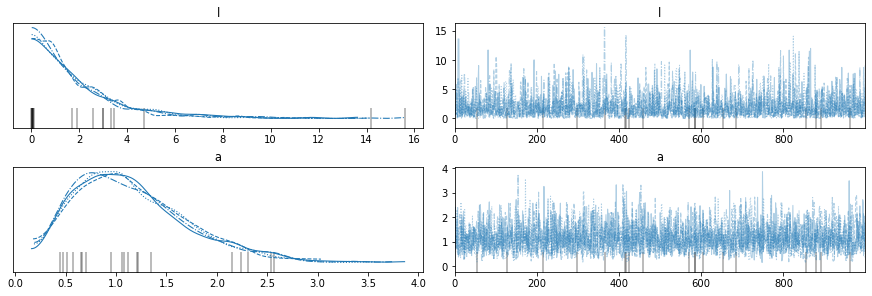

/Users/Josh/anaconda3/envs/env2/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


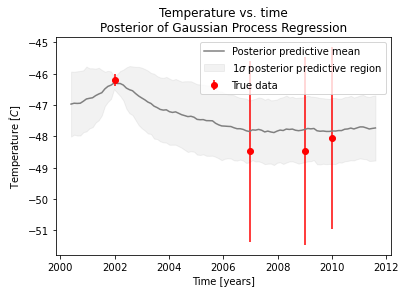

In [18]:
# fit GPR without forecasting
gpr_model = m.fit_GPR(timetable)

/Users/Josh/Desktop/physics201/icetemp/icetemp/model.py:432: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  traces = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, l]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/Josh/anaconda3/envs/env2/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


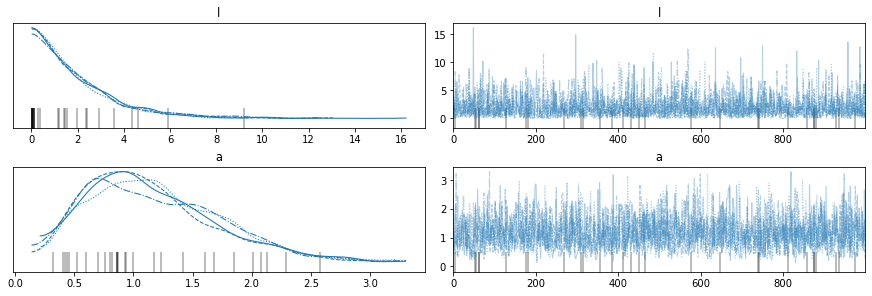

/Users/Josh/anaconda3/envs/env2/lib/python3.9/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


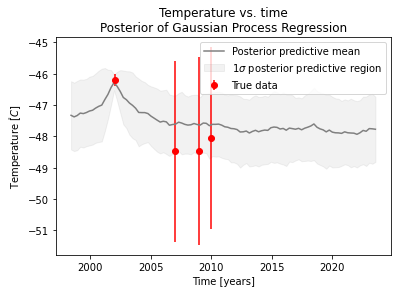

In [19]:
# fit GPR with forecasting
_ = m.fit_GPR(timetable, num_forecast_years = 10)